In [1]:
import pandas as pd

customers = pd.read_csv('Data/Customers.csv')
products = pd.read_csv('Data/Products.csv')
transactions = pd.read_csv('Data/Transactions.csv')

--- Customers Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
--- Products Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

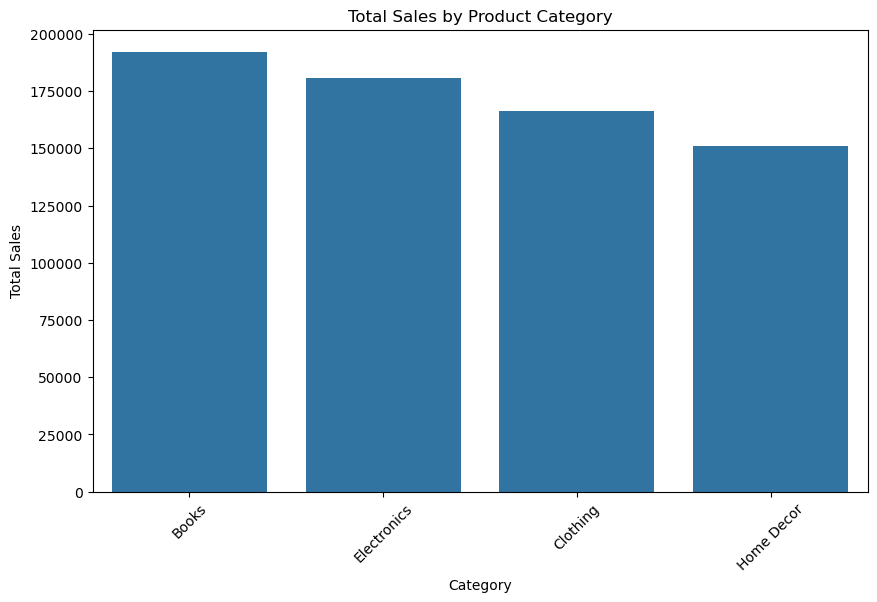

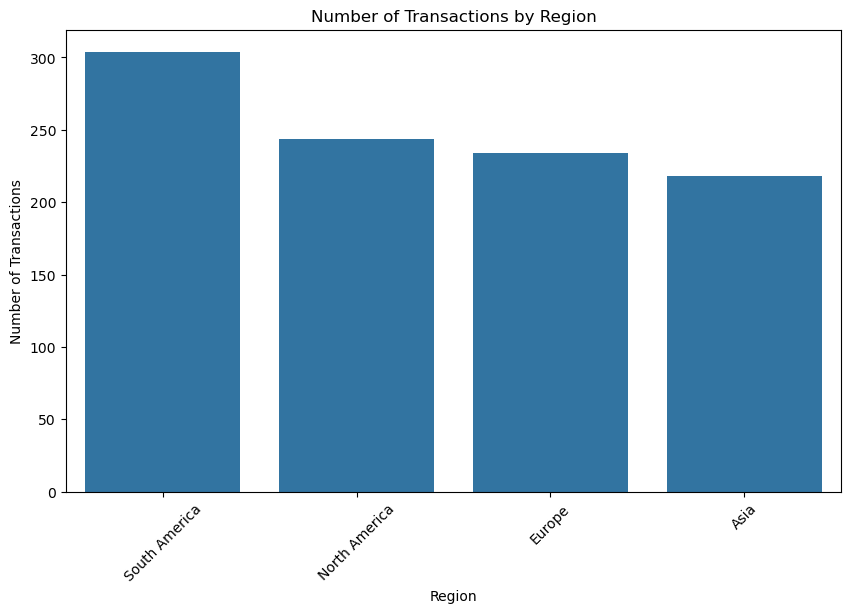

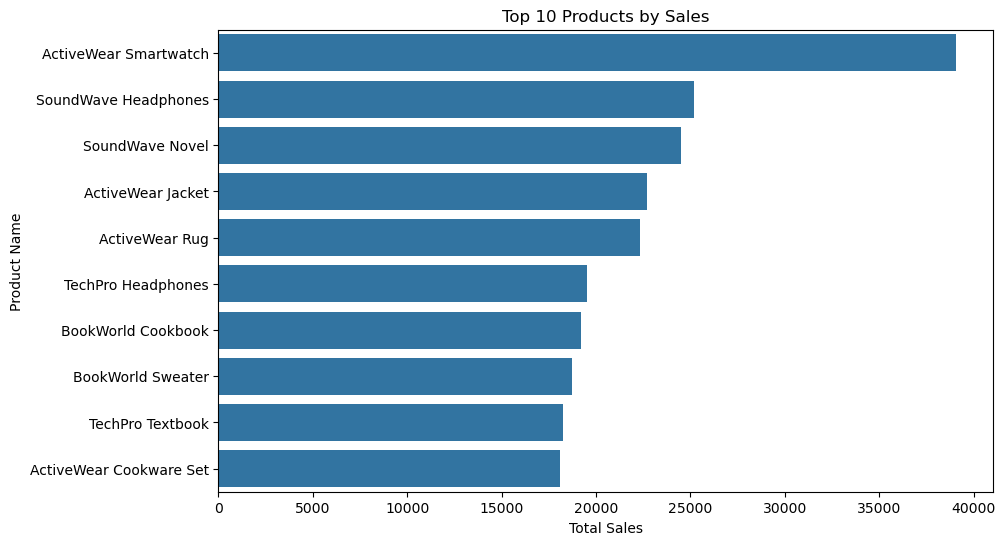

--- Business Insights ---
1. The most purchased product categories and their total sales can guide marketing strategies.
2. Regions with the highest number of transactions indicate high-value customer bases.
3. Top-performing products can be identified for inventory optimization.
4. Anomalies in missing data need to be addressed for accurate analysis.
5. Seasonal trends in transactions can be explored using transaction dates.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic information about the datasets
def dataset_overview():
    print("--- Customers Dataset ---")
    print(customers.info())
    print(customers.head())

    print("--- Products Dataset ---")
    print(products.info())
    print(products.head())

    print("--- Transactions Dataset ---")
    print(transactions.info())
    print(transactions.head())

dataset_overview()

# Check for missing values
def check_missing_values():
    print("--- Missing Values ---")
    print("Customers:")
    print(customers.isnull().sum())
    print("\nProducts:")
    print(products.isnull().sum())
    print("\nTransactions:")
    print(transactions.isnull().sum())

check_missing_values()

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Generate summary statistics
print("--- Summary Statistics ---")
print(merged_data.describe())

# Plot: Total Sales by Product Category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot: Number of Transactions by Region
region_transactions = merged_data.groupby('Region')['TransactionID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_transactions.index, y=region_transactions.values)
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Plot: Top 10 Products by Sales
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Insights Extraction
print("--- Business Insights ---")
print("1. The most purchased product categories and their total sales can guide marketing strategies.")
print("2. Regions with the highest number of transactions indicate high-value customer bases.")
print("3. Top-performing products can be identified for inventory optimization.")
print("4. Anomalies in missing data need to be addressed for accurate analysis.")
print("5. Seasonal trends in transactions can be explored using transaction dates.")


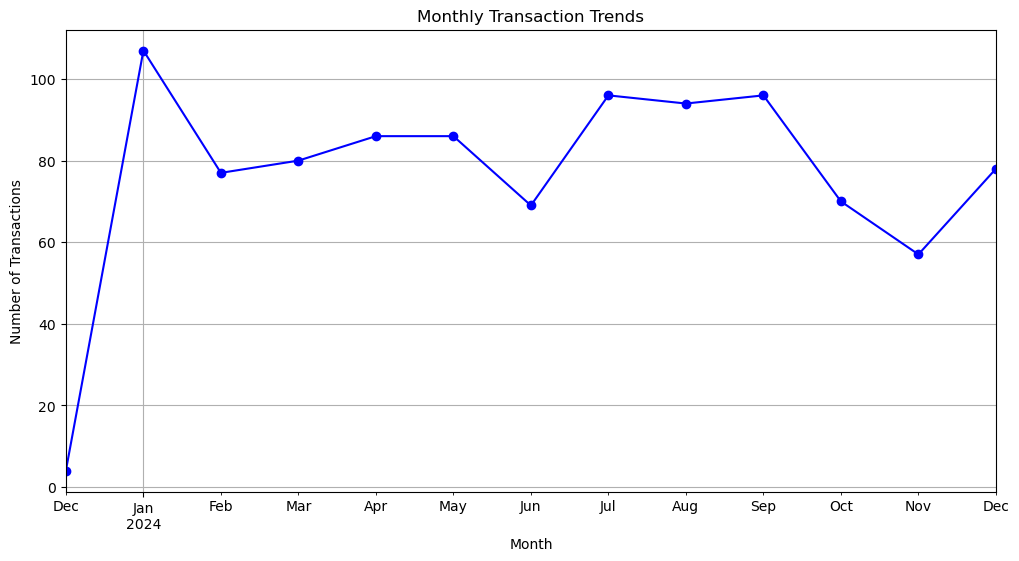

In [3]:

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

monthly_transactions = merged_data.groupby('YearMonth')['TransactionID'].count()


plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()
